# Part 3: Cluster analysis
In this part, the data sets are analyzed for clustering which will help to find usage characteristics.
For this purpose, the k-Means++ method is used, which splits the data into a predetermined number of k clusters.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

path = r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Abgabe\Data"
path_fig = r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Abgabe\Figures"

# 1. Cluster analysis for Berlin and Frankfurt

## 1.1 Berlin

In [63]:
# importing data sets 
df = pd.read_csv(path + r"\berlin_final.csv")
df.drop(columns = ["city", "Unnamed: 0", "day"], inplace = True)

Here the relevant data for clustering the Berlin set, which includes the trip duration,
geolocation of the trip origin and its destination, as well as the start time, are composed in a new dataframe.


In [64]:
df_hour_duration = df

df_start = df[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]]

df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We standardized the dataframe, as k-means is susceptible to unscaled data and used an inertia analysis
to determine the optimal number of clusters.

In [65]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[273052.6404775023, 131479.9686848315, 102793.43761667286, 80693.46560486697, 68470.63249704924, 59675.923127124755, 53222.32076725031, 46928.49043801171, 42188.41831373061, 38592.82526387598]


Now we plot the results, searching for an elbow in the curve, which would indicate an appropriate number of clusters.

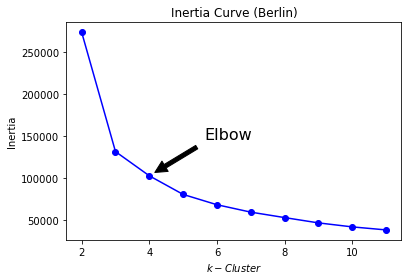

In [66]:
plt.plot(range(2, 12), inertias, "bo-")
plt.title("Inertia Curve (Berlin)")
plt.xlabel("$k-Cluster$")
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.5, 0.5), # position of Text "Elbow"
             textcoords='figure fraction',
             fontsize=16, # Size of arrow and description
             arrowprops=dict(facecolor='black', shrink=0.1)# colour of arrow
            )
plt.savefig(path_fig + r'\inertia_b.png')
plt.show()

Fitting k-means to our Berlin data set yields the following results.

The four types of clusters can be interpreted as early drivers, late drivers,
short-distance drivers and long-distance drivers.

The blue cluster (0) forms the group of early drivers.
The yellow cluster (3) forms the group of short distance riders or midday
drivers and the green cluster (1) the late drivers.
The red cluster (2) forms the group of long distance riders
regardless of time.


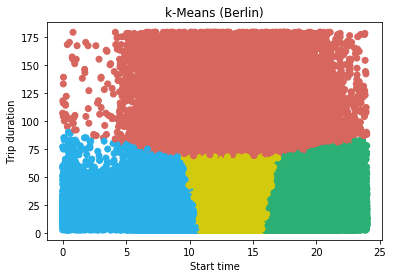

In [67]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)
plt.title("k-Means (Berlin)")
plt.xlabel("Start time")
plt.ylabel("Trip duration")
plt.savefig(path_fig + r'\kmeans_b.png')
plt.show()

Here, all coordinates of the starting points of
the rides of the four different clusters are plotted.

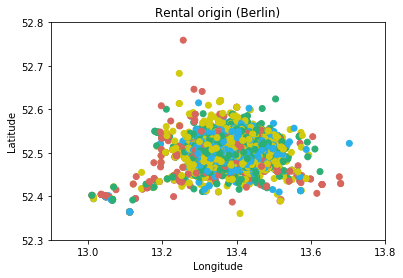

In [68]:
axes = plt.gca()
axes.set_xlim([12.9, 13.8])
axes.set_ylim([52.3, 52.8])
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)
plt.title("Rental origin (Berlin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(path_fig + r'\origin_b.png')
plt.show()

Here, all the coordinates of the end points of
the bicycle rentals of the four different clusters plotted.

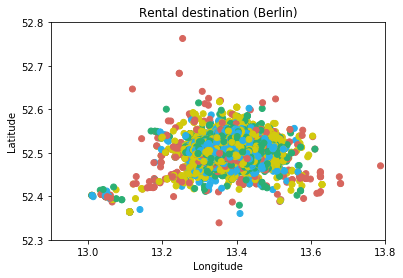

In [69]:

axes = plt.gca()
axes.set_xlim([12.9, 13.8])
axes.set_ylim([52.3, 52.8])
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)
plt.title("Rental destination (Berlin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(path_fig + r'\destination_b.png')
plt.show()

For a more detailed analysis, we have calculated the
trip count, trip share, duration share, mean duration, distance share
and mean distance for each cluster in Berlin.

In [70]:
df["cluster"] = labels
df["trip_count"] = 1
df_count = len(df)
df_grouped = df.groupby("cluster").sum()
df_final = df_grouped[["trip_count"]]
df_final["trip_share"] = df_final["trip_count"]/df_count
df_final["duration_share"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
df_final["duration_mean"] = df_grouped.trip_duration/df_grouped.trip_count
df_final["distance_share"] = df_grouped.distance/df_grouped.distance.sum()
df_final["distance_mean"] = df_grouped.distance/df_grouped.trip_count
df_final

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,trip_count,trip_share,duration_share,duration_mean,distance_share,distance_mean
cluster,,,,,,
0,54769,0.254644,0.164542,19.179262,0.248959,2.264843
1,68537,0.318657,0.218072,20.312605,0.298777,2.172036
2,19415,0.090268,0.343704,113.015194,0.119723,3.072464
3,72360,0.336431,0.273682,24.145536,0.332540,2.289764


## 1.2 Frankfurt (Main):

In [71]:
# importing data sets
df = pd.read_csv(path + r"\frankfurt_final.csv")
df.drop(columns = ["city", "Unnamed: 0", "day"], inplace = True)

Here the relevant data for clustering the Frankfurt (Main) set, which includes the trip duration,
geolocation of the trip origin and its destination, as well as the start time, are composed in a new dataframe.

In [72]:
df_hour_duration = df

df_start = df[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]]

df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


We standardized the dataframe, as k-means is susceptible to unscaled data and used an inertia analysis
to determine the optimal number of clusters.

In [73]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[25501.003212430576, 12275.014150582187, 9563.96002348853, 7394.063474488185, 6316.830966790292, 5458.615206050861, 4797.081823409565, 4190.02486137746, 3790.1841895609205, 3432.1816491517925]


Now we plot the results, searching for an elbow in the curve, which would indicate an appropriate number of clusters.

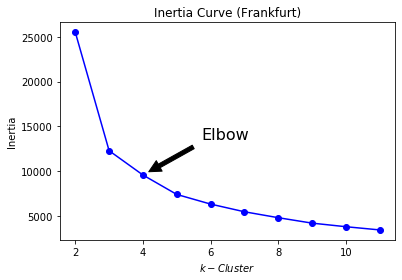

In [74]:
plt.plot(range(2, 12), inertias, "bo-")
plt.title("Inertia Curve (Frankfurt)")
plt.xlabel("$k-Cluster$")
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.5, 0.5), # position of Text "Elbow"
             textcoords='figure fraction',
             fontsize=16, # Size of arrow and description
             arrowprops=dict(facecolor='black', shrink=0.1)# colour of arrow
            )
plt.savefig(path_fig + r'\inertia_f.png')
plt.show()


Fitting k-means to our Frankfurt data set yields the following results.

The four types of clusters can be interpreted as early drivers, late drivers,
short-distance drivers and long-distance drivers.

The blue cluster (0) forms the group of early drivers.
The red cluster (2) forms the group of short distance riders or midday
drivers and the green cluster (1) the late drivers.
The yellow cluster (3) forms the group of long distance riders
regardless of time.

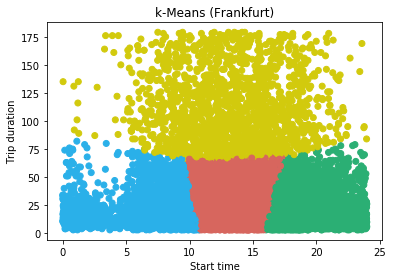

In [75]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)
plt.title("k-Means (Frankfurt)")
plt.xlabel("Start time")
plt.ylabel("Trip duration")
plt.savefig(path_fig + r'\kmeans_f.png')
plt.show()

Here, all coordinates of the starting points of
the rides of the four different clusters are plotted.

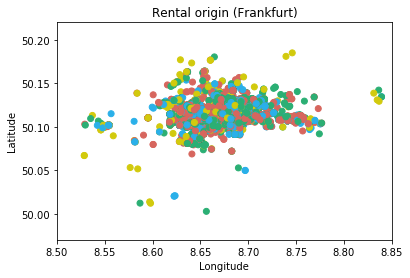

In [76]:
axes = plt.gca()
axes.set_xlim([8.5, 8.85])
axes.set_ylim([49.97, 50.22])
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)
plt.title("Rental origin (Frankfurt)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(path_fig + r'\origin_f.png')
plt.show()

Here, all the coordinates of the end points of
the bicycle rentals of the four different clusters plotted.

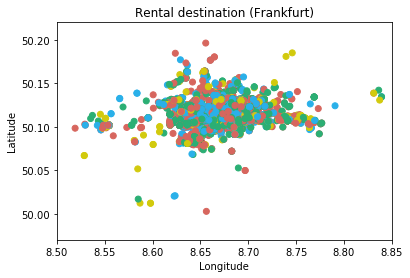

In [77]:
axes = plt.gca()
axes.set_xlim([8.5, 8.85])
axes.set_ylim([49.97, 50.22])
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)
plt.title("Rental destination (Frankfurt)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(path_fig + r'\destination_f.png')
plt.show()

For a more detailed analysis, we have calculated the
trip count, trip share, duration share, mean duration, distance share
and mean distance for each cluster in Frankfurt.

In [78]:
df["cluster"] = labels
df["trip_count"] = 1
df_count = len(df)
df_grouped = df.groupby("cluster").sum()
df_final = df_grouped[["trip_count"]]
df_final["trip_share"] = df_final["trip_count"]/df_count
df_final["duration_share"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
df_final["duration_mean"] = df_grouped.trip_duration/df_grouped.trip_count
df_final["distance_share"] = df_grouped.distance/df_grouped.distance.sum()
df_final["distance_mean"] = df_grouped.distance/df_grouped.trip_count
df_final



c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,trip_count,trip_share,duration_share,duration_mean,distance_share,distance_mean
cluster,,,,,,
0,5065,0.252467,0.162100,18.202172,0.241549,1.765752
1,6381,0.318064,0.212828,18.969597,0.300715,1.744904
2,6817,0.339797,0.273985,22.858736,0.341658,1.855680
3,1799,0.089672,0.351086,110.994441,0.116078,2.389033
